**Youtube Channel Data Analysis**


 I have conducted a data analysis of the FreeCodeCamp.org YouTube channel using the YouTube API v3 service and various Python libraries for data processing and visualization. Analyzing the popular and unpopular videos, viewership, and upload rates over a span of 2015-2023 trying to  provide valuable insights into the channel's performance and growth.

Here are the things I have done in this project:

1. **Data Collection**:
   - Used the YouTube API v3 to fetch data from the FreeCodeCamp.org channel, including information about their videos, view counts, upload dates, etc.

2. **Data Preprocessing**:
   - Cleaned and preprocessed the data to handle missing values, remove duplicates, and ensure data quality.

3. **Feature Engineering**:
   - Created new features from the existing data, such as extracting the year from upload dates, calculating video popularity metrics based on views, likes, and comments, etc.

4. **Data Visualization**:
   - Utilized Python libraries such as Matplotlib and Seaborn to create visualizations like line plots, bar charts, scatter plots, etc., to showcase trends in viewership, upload rates, and other relevant metrics.

5. **Analysis of Popular and Unpopular Videos**:
   - Identified the criteria for categorizing videos as popular or unpopular (e.g., based on the number of views, likes, comments, or a combination of these factors).
   - Conducted an analysis to understand the characteristics and patterns of popular and unpopular videos.

6. **Observations and Inferences**:
   - Drew conclusions and insights from the analysis and provided recommendations for channel improvement or content strategy based on the findings.


Remember that due to the knowledge cutoff date (September 2021), any further developments or changes after that date would not be accounted for in this response.

In [15]:
# Credentials taken from my account on Google Developer Console
api_key="XXXXXXXXXXXXXX"
channel_id="UC8butISFwT-Wl7EV0hUK0BQ"

1. Importing Necessary Libraries

In [16]:
# Data Extraction and Preprocessing packages
from googleapiclient.discovery import build
from dateutil import parser
import pandas as pd


# Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

**Data Extraction**
 Following three steps are done to complete this task
 - First using the youtube api service we extract the channel' data such as subscribers and total views and more importantly *playlist_id* of the youtube channel pointing to of all its youtube videos

 - Using the playlist id we extract the *video ids* of each video 
 
 - Using the video id we extract the data of all the videos uploaded by the channel


In [17]:
# Get credentials and create an API client
api_service_name = "youtube"
api_version = "v3"


youtube = build(
    api_service_name, api_version, developerKey=api_key)


Function to get Channel Statistics

In [18]:
def get_channel_stats(youtube,channel_id):
    '''
    Function will take in Api Client object and ID of the channel we want to extract information 
    extract the data such as channel name ,number of subscribers and playlist id
    '''
    all_data = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=channel_id
    )
    response = request.execute()

    # loop through items
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        
        all_data.append(data)
        
    return pd.DataFrame(all_data)


In [19]:
channel_data=get_channel_stats(youtube,channel_id)

In [20]:
channel_data.head()

,channelName,subscribers,views,totalVideos,playlistId
0,freeCodeCamp.org,8110000,575436904,1478,UU8butISFwT-Wl7EV0hUK0BQ


In [21]:
playlist_id='UU8butISFwT-Wl7EV0hUK0BQ'# Copied from the dataframe above

Function to get Video ids and Video Statistics

In [22]:
def get_video_ids(youtube, playlist_id):

    video_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId = playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')
        
    return video_ids

def get_video_details(youtube, video_ids):
    '''
    Function to get all video statistics of each video_id passed through function
    '''

    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favoriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)

In [23]:
# Get video IDs
video_ids = get_video_ids(youtube, playlist_id)


Extracted Data all videos 

In [24]:
# Get video details
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,u8vMu7viCm8,freeCodeCamp.org,Testing JavaScript with Cypress – Full Course,Learn how to use Cypress to test JavaScript ap...,None,2023-08-07T13:19:55Z,3913,400,0,29,PT2H39M33S,hd,false
1,kxyAk_K-wE4,freeCodeCamp.org,JavaScript Tutorial – Celsius to Fahrenheit,Learn JavaScript here: https://www.youtube.com...,None,2023-08-04T15:33:31Z,22479,1087,0,31,PT50S,hd,false
2,8m3LvPg8EuI,freeCodeCamp.org,TensorFlow Course – Building and Evaluating Me...,Learn how to build and evaluate medical AI mod...,None,2023-08-03T13:00:31Z,25927,1004,0,44,PT1H9M47S,hd,true
3,agEPmYdbQLs,freeCodeCamp.org,AI Safety – Full Course by Safe.AI Founder on ...,"ML systems are rapidly increasing in size, are...",None,2023-08-02T12:08:26Z,24626,1021,0,68,PT8H34M20S,hd,false
4,FJAO6jDYljs,freeCodeCamp.org,Project-Based Augmented Reality Course with Un...,Learn Augmented Reality development in this fu...,None,2023-07-27T12:53:33Z,30063,1007,0,44,PT2H2M24S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,_uWzpyr_5qk,freeCodeCamp.org,Computer Basics 5: How To Measure Data Size,http://FreeCodeCamp.com is a community of busy...,"[Free Code Camp, JavaScript, Pair Programming,...",2015-07-17T08:31:23Z,50018,None,0,33,PT2M24S,hd,false
1475,xXLj5MbrI44,freeCodeCamp.org,Computer Basics 4: Decoding a Binary Number,http://FreeCodeCamp.com is a community of busy...,"[Free Code Camp, JavaScript, Pair Programming,...",2015-07-17T08:31:20Z,65144,None,0,36,PT1M42S,hd,true
1476,veugT7A9psY,freeCodeCamp.org,Computer Basics 3: Intro to Binary Code,http://FreeCodeCamp.com is a community of busy...,"[Free Code Camp, JavaScript, Pair Programming,...",2015-07-17T08:31:17Z,55341,None,0,12,PT1M,hd,true
1477,xj9mFD71Vfc,freeCodeCamp.org,Computer Basics 2: More Computer Hardware,http://FreeCodeCamp.com is a community of busy...,"[Free Code Camp, JavaScript, Pair Programming,...",2015-07-17T08:31:14Z,64104,None,0,16,PT1M12S,hd,true


In [25]:
video_df.to_csv('Video_data')# Saved raw data which you can find in data folder

**Data Preprocessing & Feature Engineering**

In [11]:
video_df.dtypes

video_id         object
channelTitle     object
title            object
description      object
tags             object
publishedAt      object
viewCount        object
likeCount        object
favoriteCount    object
commentCount     object
duration         object
definition       object
caption          object
dtype: object

In [12]:
# Convert count columns to numeric
numeric_cols = ['viewCount', 'likeCount', 'favoriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)
# Publish day in the week
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 


In [13]:
#finding months year and hour of publication
video_df["publish_Year"]=video_df["publishedAt"].apply(lambda x:x.year)
video_df["publish_Month"]=video_df["publishedAt"].apply(lambda x:x.month)
video_df['publish_Hour']=video_df["publishedAt"].apply(lambda x:x.hour)

In [14]:
#let's convert the months for publication into month names from month numbers
month = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
		10:'October',11:'November',12:'December'}

video_df["publish_Month"]=video_df["publish_Month"].map(month)


In [15]:
# convert duration to seconds
import isodate# library used change duration in iso format to seconds format
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [16]:
#Column to see the no.of tags made in video
video_df['tagCount']=video_df['tags'].apply( lambda x:0 if x is None else len(x))

Handling Null Values

In [17]:
video_df.isnull().any()# Checking for columns with null values

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount          True
favoriteCount     False
commentCount      False
duration          False
definition        False
caption           False
publishDayName    False
publish_Year      False
publish_Month     False
publish_Hour      False
durationSecs      False
tagCount          False
dtype: bool

In [18]:
#Looking at the dataset video_df, we observe 
# fav_count does not have even one non zero value no reason keeping it
print("No.of non zero values is " ,len(video_df)-len(video_df[video_df['favoriteCount']==0]))#All of them null no point keeping 
video_df.drop("favoriteCount",axis=1,inplace=True)

No.of non zero values is  0


In [19]:
#Assuming null value in tags columns mean there was no tgs made by the channel so keeping it blank list
video_df['tags']=video_df['tags'].apply(lambda d:d if isinstance(d,list) else [])


In [20]:
#Equating np.nan is a complicated so lets replace NaN with 0 then fill it the way we want
video_df['likeCount'].fillna(0,inplace=True)



In [21]:
#Filling the na values of count to be the mean value of likes of the same year and month
for x in video_df.index:
    if video_df.loc[x,'likeCount']==-1:
        year=video_df.loc[x,"publish_Year"]
        month=video_df.loc[x,'publish_Month']
        estimate=int(video_df[(video_df["publish_Year"]==year)&(video_df["publish_Month"]==month)]['likeCount'].mean())
        video_df.loc[x,'likeCount']=float(estimate)

In [22]:
video_df.isnull().any()# Data cleaned

video_id          False
channelTitle      False
title             False
description       False
tags              False
publishedAt       False
viewCount         False
likeCount         False
commentCount      False
duration          False
definition        False
caption           False
publishDayName    False
publish_Year      False
publish_Month     False
publish_Hour      False
durationSecs      False
tagCount          False
dtype: bool

Exploratory Data Analysis

Most Viewed videos

C:\conda_tmp/ipykernel_4044/6040358.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in current_values])


[Text(0.0, 0, '0K'),
 Text(5000000.0, 0, '5,000K'),
 Text(10000000.0, 0, '10,000K'),
 Text(15000000.0, 0, '15,000K'),
 Text(20000000.0, 0, '20,000K'),
 Text(25000000.0, 0, '25,000K'),
 Text(30000000.0, 0, '30,000K'),
 Text(35000000.0, 0, '35,000K'),
 Text(40000000.0, 0, '40,000K'),
 Text(45000000.0, 0, '45,000K')]

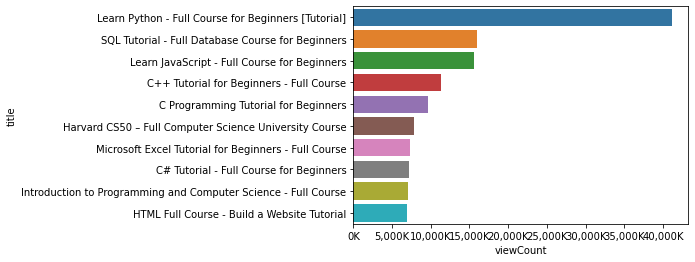

In [23]:
sns.barplot(y='title',x='viewCount',data=video_df.sort_values('viewCount',ascending=False).head(10))

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in current_values])


Least Viewed Videos

C:\conda_tmp/ipykernel_2496/1068793155.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0.0, 0, '0'),
 Text(200.0, 0, '200'),
 Text(400.0, 0, '400'),
 Text(600.0, 0, '600'),
 Text(800.0, 0, '800'),
 Text(1000.0, 0, '1,000'),
 Text(1200.0, 0, '1,200'),
 Text(1400.0, 0, '1,400')]

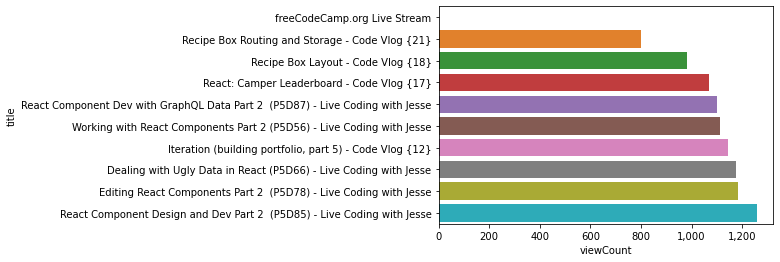

In [41]:
sns.barplot(y='title',x='viewCount',data=video_df.sort_values('viewCount',ascending=True).head(10))

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

Views and  video duration  distribution of the channel

c:\Users\Sarthak Mahapatra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\conda_tmp/ipykernel_2496/933179515.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000)+'K' for x in current_values])


[Text(0, -10000000.0, '-10,000K'),
 Text(0, 0.0, '0K'),
 Text(0, 10000000.0, '10,000K'),
 Text(0, 20000000.0, '20,000K'),
 Text(0, 30000000.0, '30,000K'),
 Text(0, 40000000.0, '40,000K'),
 Text(0, 50000000.0, '50,000K')]

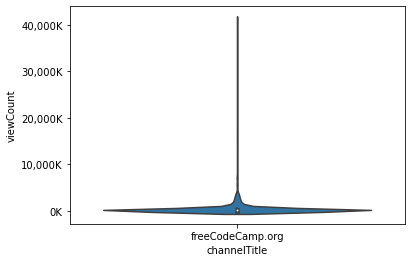

In [42]:
sns.violinplot(video_df['channelTitle'], video_df['viewCount'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000)+'K' for x in current_values])

<AxesSubplot:ylabel='Frequency'>

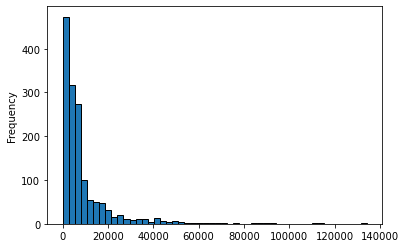

In [108]:
video_df['durationSecs'].plot.hist(bins=50,ec='black')


Relationship of  number of likes ,comments, captions given or not and video duration with  Viewership

<AxesSubplot:title={'center':'Viewership vs duration of video (in Seconds)'}, xlabel='durationSecs', ylabel='viewCount'>

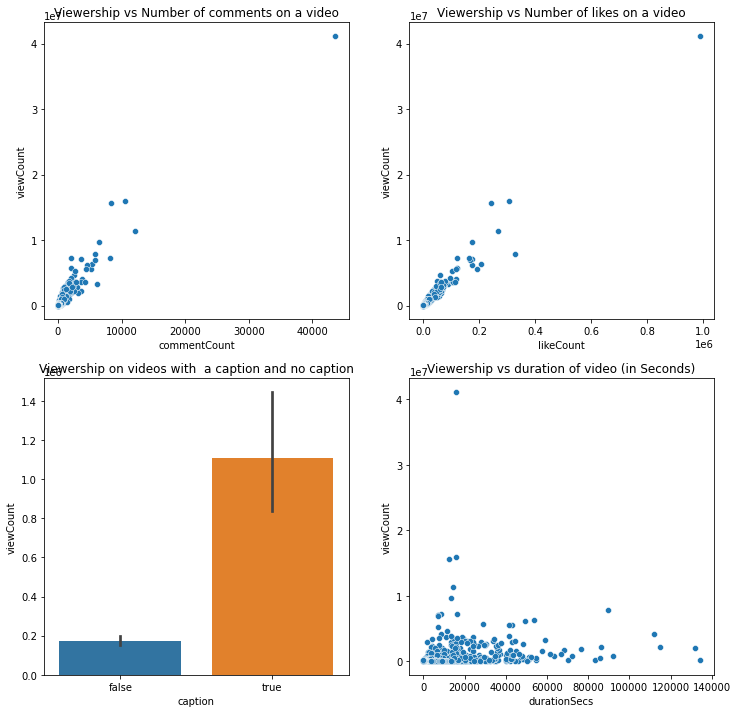

In [90]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
ax[0][0].set_title("Viewership vs Number of comments on a video")
ax[0][1].set_title("Viewership vs Number of likes on a video")
ax[1][0].set_title("Viewership on videos with  a caption and no caption")
ax[1][1].set_title("Viewership vs duration of video (in Seconds)")
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0][0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[0][1])
sns.barplot(data= video_df, x= 'caption', y= 'viewCount', ax=ax[1][0])
sns.scatterplot(data= video_df, x= 'durationSecs', y= 'viewCount', ax=ax[1][1])

As freecodecamp is popular for its uploads in programming domain
Looking at Uploads related to popular programming languages(top 20 according to simplilearn) and their viewership


In [91]:
prog_langs=['Javascript','Python','Go,Java','Kotlin',
            'PHP','C#','Swift','R','Ruby','C','C++',
            'Matlab','TypeScript','Scala','SQL','HTML','NoSQL','Rust','Perl']


In [92]:
dict1={}#will store the number of videos associated with these programming language
dict2={}#will store accumulative views of videos associated with the programming language
for x in video_df.index:
    lst=video_df.loc[x,"title"].split(" ")
    for progs in prog_langs:
        if (progs in lst) and (progs not in dict1.keys()):
            dict1[progs]=1
            dict2[progs]=video_df.loc[x,'viewCount']
        elif (progs in lst) :
            dict1[progs]+=1
            dict2[progs]+=video_df.loc[x,'viewCount']

            

In [93]:
programs=pd.DataFrame(dict1.values(),index=dict1.keys())
programs.reset_index(inplace=True)
programs.columns=['Language','Uploads Related to the Prog.Language']

In [94]:
#Adding column Views in programs dataframe
programs['Viewership of videos related to that Prog Language']=np.zeros(len(programs))

In [95]:
for x in programs.index:
    programs.loc[x,'Viewership of videos related to that Prog Language']=dict2[programs.loc[x,'Language']]

In [96]:
programs

,Language,Uploads Related to the Prog.Language,Viewership of videos related to that Prog Language
0,HTML,19,15345883.0
1,Python,122,128874494.0
2,C#,10,12273137.0
3,C,6,16300832.0
4,Rust,2,461587.0
5,SQL,11,16852870.0
6,TypeScript,9,1768267.0
7,Swift,3,943588.0
8,Kotlin,7,2681231.0
9,NoSQL,2,710365.0


<AxesSubplot:xlabel='Uploads Related to the Prog.Language', ylabel='Language'>

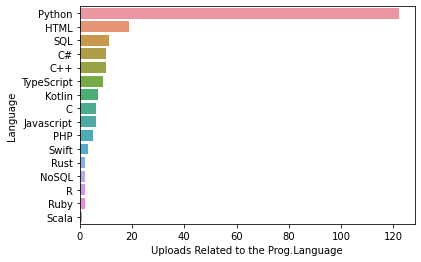

In [97]:
sns.barplot(y='Language',x='Uploads Related to the Prog.Language',data=programs.sort_values('Uploads Related to the Prog.Language',ascending=False))


<AxesSubplot:xlabel='Viewership of videos related to that Prog Language', ylabel='Language'>

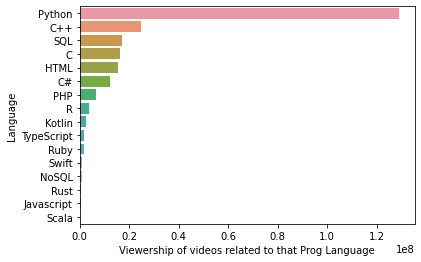

In [98]:
sns.barplot(y='Language',x='Viewership of videos related to that Prog Language',data=programs.sort_values('Viewership of videos related to that Prog Language',ascending=False))

Looking at upload and viewership trends through out the years

Text(0, 0.5, 'Videos Uploaded')

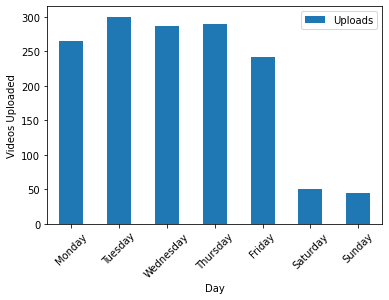

In [99]:
day_df = pd.DataFrame(video_df['publishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
day_df.reset_index(inplace=True)
day_df.columns=["Day","Uploads"]
day_df.plot.bar(x='Day',y='Uploads',rot=45)
plt.ylabel("Videos Uploaded")


Text(0, 0.5, 'Videos Uploaded')

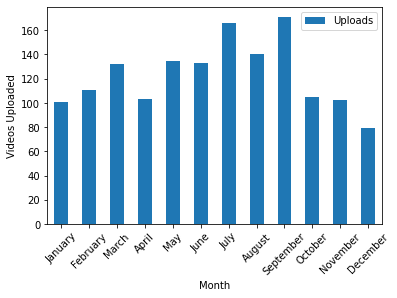

In [100]:
month_df = pd.DataFrame(video_df['publish_Month'].value_counts())
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_df = month_df.reindex(months)
month_df.reset_index(inplace=True)
month_df.columns=['Month','Uploads']
month_df.plot.bar(x='Month',y='Uploads',rot=45)
plt.ylabel("Videos Uploaded")

Text(0, 0.5, 'Videos Uploaded')

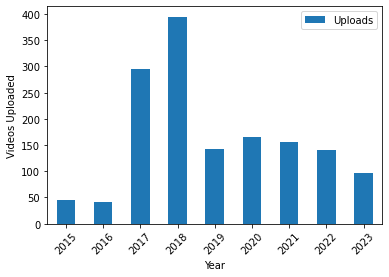

In [101]:
year_df = pd.DataFrame(video_df['publish_Year'].value_counts())
years = list(range(2015,2024))
year_df = year_df.reindex(years)
year_df.reset_index(inplace=True)
year_df.columns=['Year','Uploads']
year_df.plot.bar(x='Year',y='Uploads',rot=45)
plt.ylabel("Videos Uploaded")

Annual Monthly trend of uploads

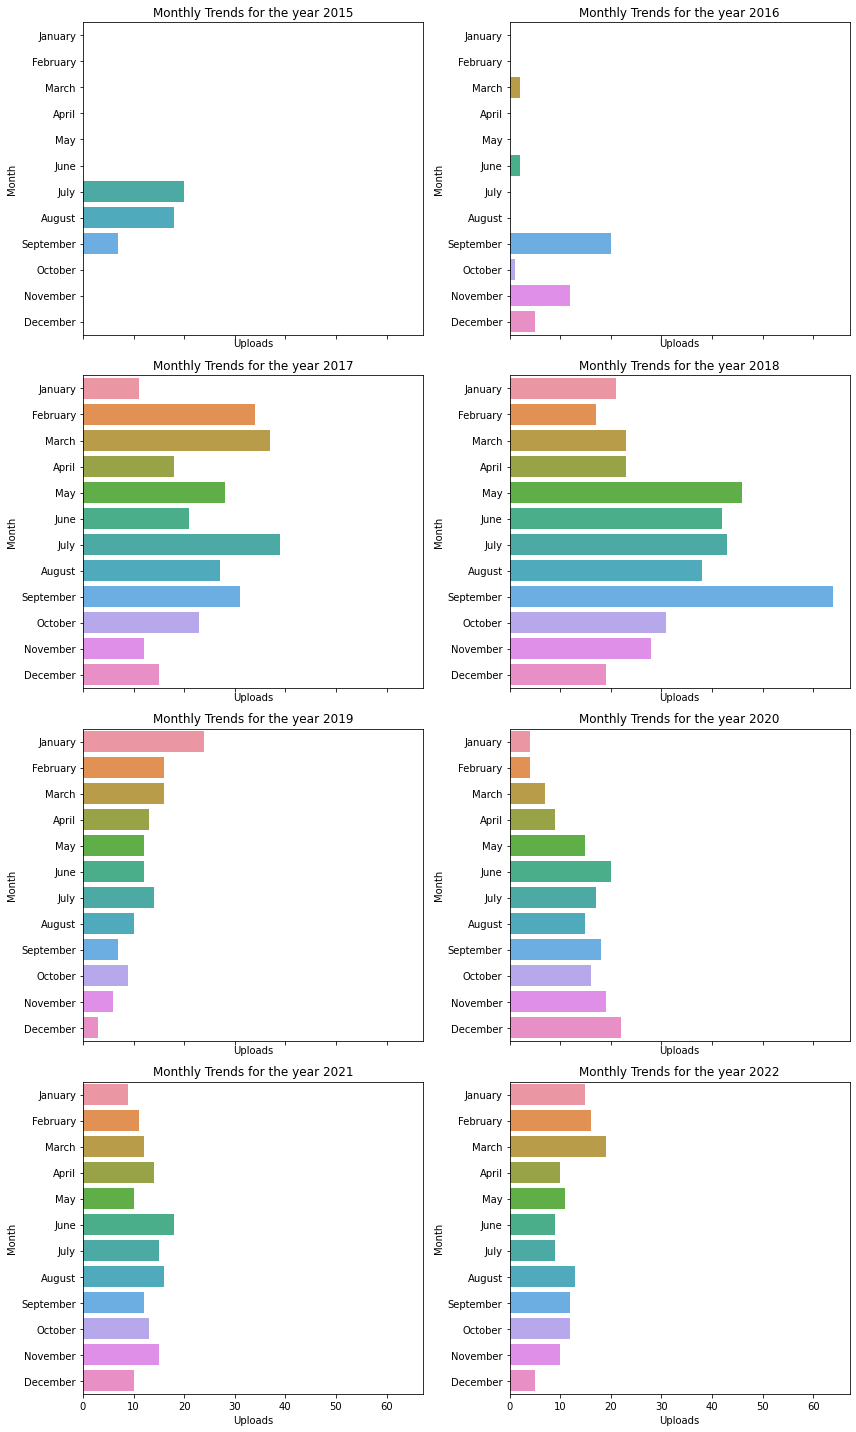

In [26]:
fig,ax=plt.subplots(4,2,figsize=(12,20),sharex=True)
yr=2015
for i in range(0,4):
    month_df1 = pd.DataFrame(video_df[video_df['publish_Year']==yr]['publish_Month'].value_counts())
    month_df2 = pd.DataFrame(video_df[video_df['publish_Year']==yr+1]['publish_Month'].value_counts())
    months = ['January','February','March','April','May','June','July','August','September','October','November','December']
    month_df1 = month_df1.reindex(months)
    month_df2 = month_df2.reindex(months)
    month_df1.reset_index(inplace=True)
    month_df2.reset_index(inplace=True)
    month_df1.columns=['Month','Uploads']
    month_df2.columns=['Month','Uploads']
    sns.barplot(y='Month',x='Uploads',data=month_df1,ax=ax[i][0])
    sns.barplot(y='Month',x='Uploads',data=month_df2,ax=ax[i][1])
    ax[i][0].set_title(f"Monthly Trends for the year {yr}")
    ax[i][1].set_title(f"Monthly Trends for the year {yr+1}")
    yr+=2
    
    
plt.tight_layout()

Text(0, 0.5, 'Views')

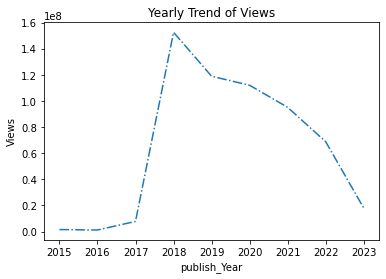

In [105]:
video_df.groupby(by='publish_Year').sum()['viewCount'].plot(ls='-.')
plt.title('Yearly Trend of Views')
plt.ylabel("Views")

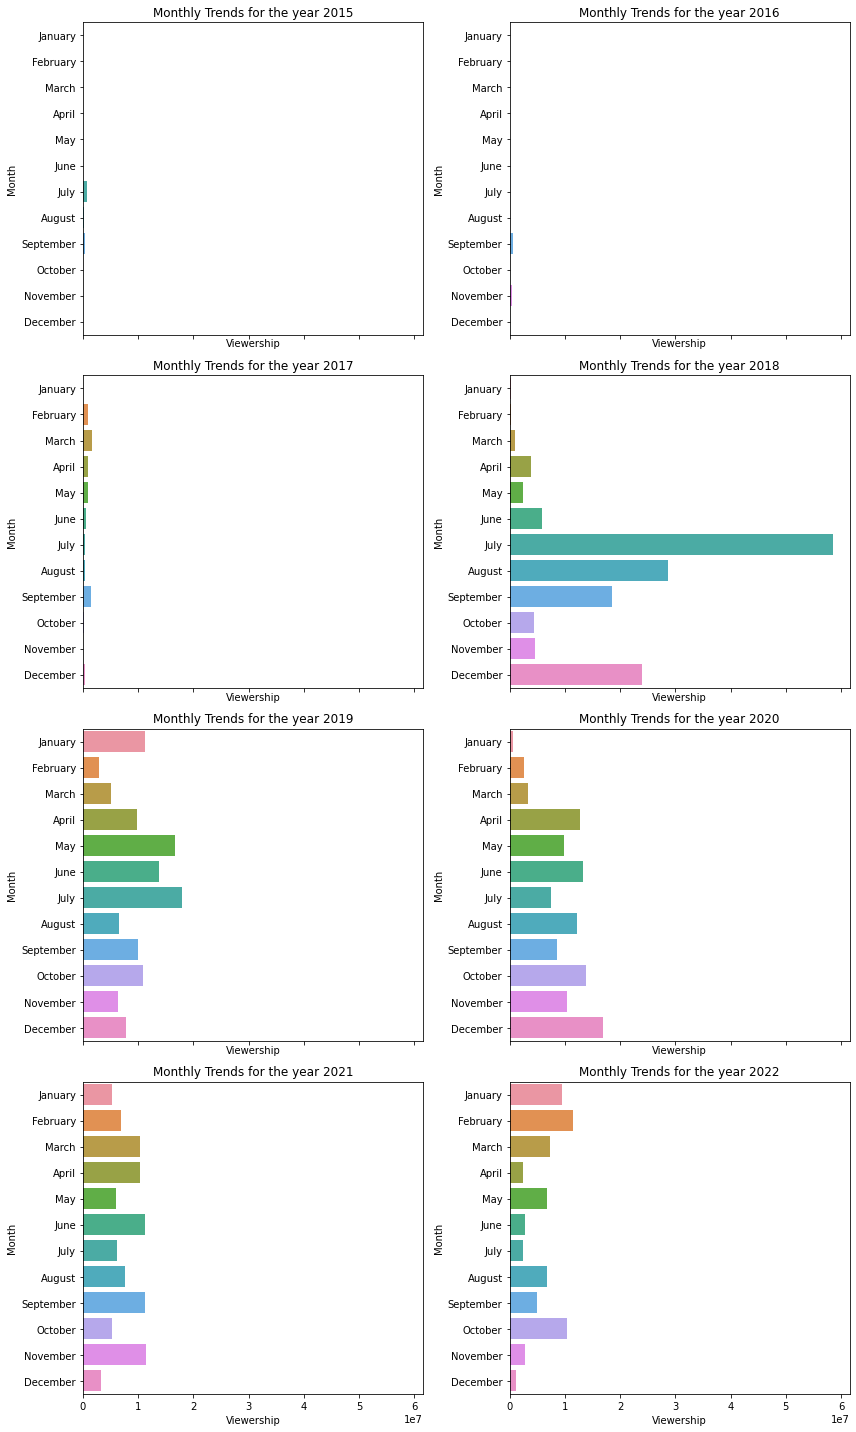

In [28]:
fig,ax=plt.subplots(4,2,figsize=(12,20),sharex=True)
yr=2015
for i in range(0,4):
    month_df1 = pd.DataFrame(video_df[video_df['publish_Year']==yr].groupby(by='publish_Month').sum()['viewCount'])
    month_df2 = pd.DataFrame(video_df[video_df['publish_Year']==yr+1].groupby(by='publish_Month').sum()['viewCount'])
    months = ['January','February','March','April','May','June','July','August','September','October','November','December']
    month_df1 = month_df1.reindex(months)
    month_df2 = month_df2.reindex(months)
    month_df1.reset_index(inplace=True)
    month_df2.reset_index(inplace=True)
    month_df1.columns=['Month','Viewership']
    month_df2.columns=['Month','Viewership']
    sns.barplot(y='Month',x='Viewership',data=month_df1,ax=ax[i][0])
    sns.barplot(y='Month',x='Viewership',data=month_df2,ax=ax[i][1])
    ax[i][0].set_title(f"Monthly Trends for the year {yr}")
    ax[i][1].set_title(f"Monthly Trends for the year {yr+1}")
    yr+=2
    plt.tight_layout()

In [149]:
monthYear_views=video_df.groupby(by=['publish_Month','publish_Year']).sum()['viewCount'].unstack().fillna(0)

monthYear_uploads=video_df.groupby(by=['publish_Month','publish_Year']).count()['video_id'].unstack().fillna(0)



<AxesSubplot:title={'center':'Number of Uploads in month-Year'}, xlabel='publish_Year', ylabel='publish_Month'>

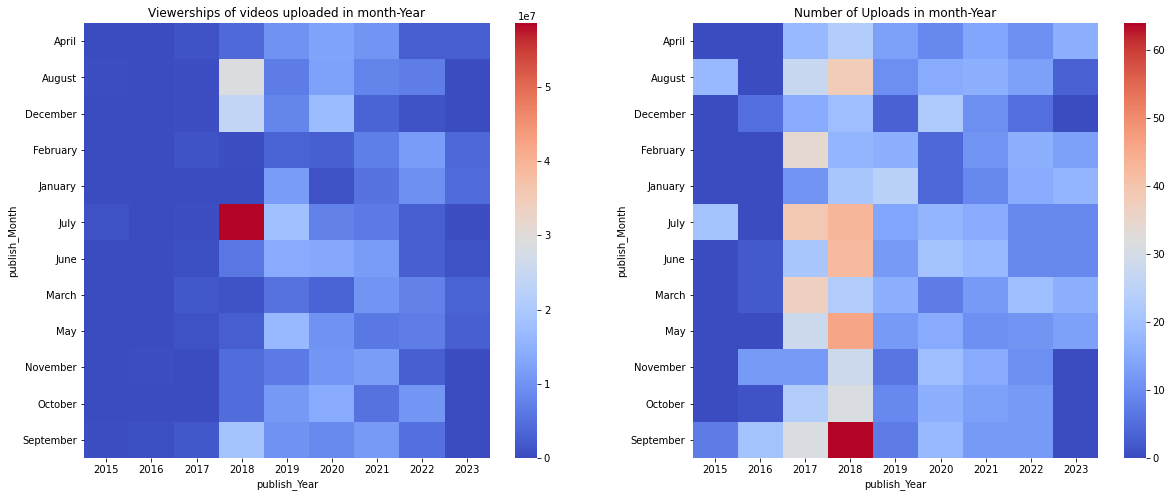

In [152]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].set_title("Viewerships of videos uploaded in month-Year")
ax[1].set_title('Number of Uploads in month-Year')
sns.heatmap(monthYear_views,cmap='coolwarm',ax=ax[0])
sns.heatmap(monthYear_uploads,cmap='coolwarm',ax=ax[1])



**Observation and Inferences made by EDA**:

- Number of likes and comments  made on the video has a somewhat of a linear relationship with Views on the video

- Keeping captions has made a difference in viewership, but views on a video don't have correlation to length of a video

- Programming tutorials contribute most to the viewership, whereas coding vlogs and live sessions are not that among free code camp viewers

- Python & SQL being popular in the tech domain have seen it's popularity been reflected in the viewership  and no. of uploads made by free code camp which are related to these programming language

- Looking at the uploading schedule (day wise), free code camp majorly publish their videos in the weekdays especially Tuesday whereas free code camp uploads a low number of videos in the weekend.Looking it in a monthly perspective July-September period is been a time free code camp has uploaded a lot.


- Annually, uploading reached it's peak during 2017 and 2018 after which it has taken a steady decline.From having not even one upload in some months in 2015-2016,Post 2016 free code camp uploads 5-10 videos per month,whereas most have been during fall(july-sept) season , second highest upload season is during spring(feb-march)


-  Post 2018 free code camp upload rate has been low but consistent.Videos uploaded during 2017 and 2018 have been high but it could be high  for two reasons one  that the number of upload were high too in that time period and secondly the videos were very good academic quality viewers have found it very useful. Especially videos uploaded in months such as July,March in most of years have seen high viewership , a big factor might be that, that is a very hot time company intakes, viewers are learning or brushing up their skills for job preparation, 

-  Although September  2018 uploaded a lot videos but July 2018's uploaded video see the most views one major reason is that Python tutorial which is their most popular video of all time was released
 that time.


